In [4]:
## Importing Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [6]:
df = pd.read_csv('Data_Science/Stock_Price_Prediction/all_stocks_5yr.csv')

In [5]:
df.head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [25]:
df.shape

(619040, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


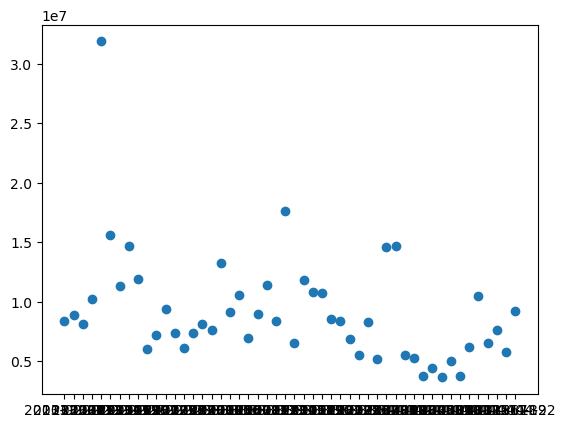

In [41]:
plt.scatter(x=df['date'][:50],y=df['volume'][:50])

In [43]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


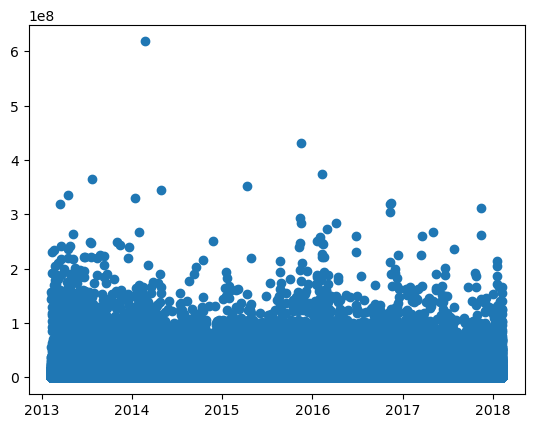

In [47]:
plt.scatter(x=df['date'],y=df['volume'])

In [68]:
sf = df['Name'].value_counts()
sf

Name
AAL     1259
NRG     1259
NOC     1259
NLSN    1259
NKE     1259
        ... 
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: count, Length: 505, dtype: int64

In [82]:
df_info = pd.DataFrame({'Name':sf.index, 'data_count': sf.values, 
                        'count_percentage':sf.values*100/df.shape[0]})
df_info.tail(30)

,Name,data_count,count_percentage
475,O,1243,0.200795
476,IQV,1197,0.193364
477,COTY,1173,0.189487
478,NWSA,1169,0.188841
479,FOXA,1169,0.188841
480,FOX,1169,0.188841
481,NWS,1169,0.188841
482,ALLE,1063,0.171717
483,GOOG,975,0.157502
484,NAVI,960,0.155079


In [86]:
df_info.describe()

,data_count,count_percentage
count,505.000000,505.000000
mean,1225.821782,0.198020
std,160.533275,0.025933
min,44.000000,0.007108
25%,1259.000000,0.203379
50%,1259.000000,0.203379
75%,1259.000000,0.203379
max,1259.000000,0.203379


{'whiskers': [<matplotlib.lines.Line2D at 0x28906e270>,
 'caps': [<matplotlib.lines.Line2D at 0x28906c680>,
 'boxes': [<matplotlib.lines.Line2D at 0x28906e330>],
 'medians': [<matplotlib.lines.Line2D at 0x28906f3b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28906eff0>],
 'means': []}

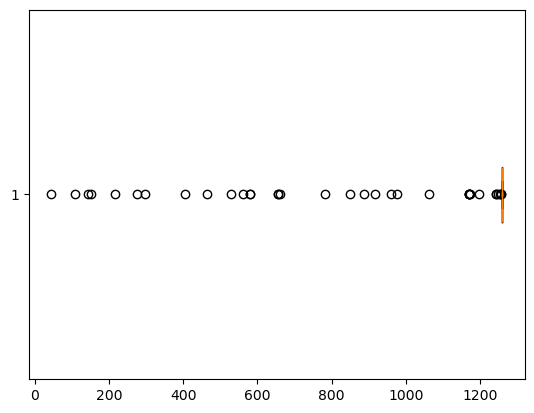

In [95]:
plt.boxplot(x=df_info['data_count'], vert=False)

In [8]:
x= df[df['Name'] == 'AAL']
x

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL


In [10]:

data = x.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1197

In [12]:
dataset

array([[14.75],
       [14.46],
       [14.27],
       ...,
       [49.76],
       [51.18],
       [51.4 ]])

In [14]:
train_data = dataset[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

print(x_train)


[array([14.75, 14.46, 14.27, 14.66, 13.99, 14.5 , 14.26, 13.33, 13.37,
       13.57, 13.02, 13.26, 13.41, 13.43, 13.61, 13.9 , 14.05, 14.57,
       14.82, 14.92, 15.13, 15.5 , 15.91, 16.25, 15.98, 16.29, 16.78,
       17.23, 17.  , 16.86, 16.6 , 16.51, 16.65, 16.97, 16.67, 15.74,
       15.53, 15.69, 15.72, 15.84, 15.7 , 15.78, 16.19, 16.14, 15.59,
       16.37, 16.52, 16.1 , 16.02, 15.52, 16.3 , 16.45, 16.22, 16.59,
       16.81, 16.9 , 16.6 , 16.94, 17.02, 17.  ]), array([14.46, 14.27, 14.66, 13.99, 14.5 , 14.26, 13.33, 13.37, 13.57,
       13.02, 13.26, 13.41, 13.43, 13.61, 13.9 , 14.05, 14.57, 14.82,
       14.92, 15.13, 15.5 , 15.91, 16.25, 15.98, 16.29, 16.78, 17.23,
       17.  , 16.86, 16.6 , 16.51, 16.65, 16.97, 16.67, 15.74, 15.53,
       15.69, 15.72, 15.84, 15.7 , 15.78, 16.19, 16.14, 15.59, 16.37,
       16.52, 16.1 , 16.02, 15.52, 16.3 , 16.45, 16.22, 16.59, 16.81,
       16.9 , 16.6 , 16.94, 17.02, 17.  , 16.98]), array([14.27, 14.66, 13.99, 14.5 , 14.26, 13.33, 13.37, 1

In [116]:
train_data

array([[14.75],
       [14.46],
       [14.27],
       ...,
       [67.59],
       [67.73],
       [67.81]])